In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Polygon
from matplotlib.ticker import AutoMinorLocator

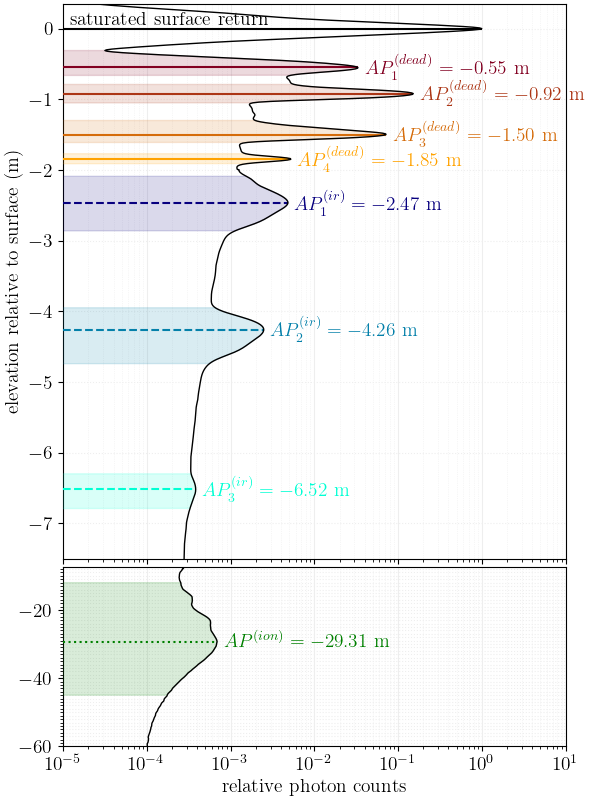

In [2]:
df = pd.read_csv('data/saturation_counts_alldata_wider.csv')

plt.rcParams.update({
    'font.size': 14,
    'text.usetex': True,
    'font.family': 'Optima'
})

thresh_upper = 0.35
thresh_lower = -7.5
thresh_tail = -60.0

peak_target_elevs = [0.0, -0.55, -0.92, -1.50, -1.85, -2.47, -4.26, -6.52]
peak_starts = [0.0, -0.31, -0.79, -1.30, -1.77, -2.09, -3.95, -6.3]
peak_ends = [0.0, -0.67, -1.06, -1.62, -1.92, -2.87, -4.75, -6.8]
# lower internal reflection and PMT ionization: -6.52, -29.31
peak_labels = ['surface'] + [r'$AP_%i^{(dead)}=' % (i+1) for i in range(4)] + [r'$AP_%i^{(ir)}=' % (i+1) for i in range(3)]
widths_pk = [0.0, 0.3, 0.225, 0.225, 0.225, 0.35, 0.3]
cols_pk = ['black','#820021', '#AC3616', '#D56C0B', '#FFA200', '#08007F', '#0480AA', '#00FFD4']
lsty_pk = ['-', '-', '-', '-', '-', '--', '--', '--']

# for j, beam_select in enumerate(['all', 'strong', 'weak'] + list(np.arange(1,7))):
for j, beam_select in enumerate(['all']):
# for j, beam_select in enumerate(['all', 'strong', 'weak']):
# for j, beam_select in enumerate([4]):  
    fig = plt.figure(figsize=[6, 8], dpi=100)
    gs = fig.add_gridspec(4, 1)
    ax = fig.add_subplot(gs[:3, 0])
    ax2 = fig.add_subplot(gs[3, 0], sharex=ax)
    plt.setp(ax.get_xticklabels(), visible=False)
    ylms = (thresh_lower, thresh_upper)
    xlim_ax = (1e-5,10)

    vals = df['smooth_%s'%beam_select]
    ax.plot(vals, df.elev_bins, 'k-', lw=1, zorder=1000)
    for i in range(len(peak_target_elevs)):
        thish = peak_target_elevs[i]
        thispeak_height = vals.iloc[np.argmin(np.abs(df.elev_bins-thish))]
        ax.plot([xlim_ax[0], thispeak_height], [thish]*2, color=cols_pk[i], ls=lsty_pk[i], zorder=100,solid_capstyle='butt')
        if i == 0:
            ax.text(1.2*xlim_ax[0], thish, 'saturated surface return', color=cols_pk[i], ha='left', va='bottom')
        else:
            ax.text(thispeak_height*1.2, thish, r'%s%.2f$ m' % (peak_labels[i],thish), color=cols_pk[i], weight='bold', va='center')
            u = peak_starts[i]
            l = peak_ends[i]
            ys = [u, l] + list(df.elev_bins[(df.elev_bins <= u) & (df.elev_bins >= l)]) + [u]
            xs = [1e-12, 1e-12] +  list(vals[(df.elev_bins <= u) & (df.elev_bins >= l)]) + [1e-12]
            ax.add_patch(Polygon(np.transpose(np.vstack((xs,ys))), color=cols_pk[i], alpha=0.15,zorder=50))

    if type(beam_select) == str:
        tit = '%s beams' % beam_select
    else:
        tit = 'beam %i' % beam_select
    if j != 0:
        ax.set_title(tit)
    
    ax.set_ylabel('elevation relative to surface (m)')
    ax.set_xlim(xlim_ax)
    ax.set_ylim(ylms)
    ax.set_xscale('log')
    ax.axes.yaxis.grid(which='major', color='#EEEEEE', linestyle=':', linewidth=0.8, zorder=-1000)
    ax.axes.xaxis.grid(which='major', color='#EEEEEE', linewidth=0.8, zorder=-1000)
    ax.axes.xaxis.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5, zorder=-1000)
    # ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

    ax2.plot(vals, df.elev_bins, 'k-', lw=1, zorder=1000)
    u = -12
    l = -45
    ys = [u, l] + list(df.elev_bins[(df.elev_bins <= u) & (df.elev_bins >= l)]) + [u]
    xs = [1e-12, 1e-12] +  list(vals[(df.elev_bins <= u) & (df.elev_bins >= l)]) + [1e-12]
    ax2.add_patch(Polygon(np.transpose(np.vstack((xs,ys))), color='g', alpha=0.15,zorder=50))
    thish = -29.31
    thispeak_height = vals.iloc[np.argmin(np.abs(df.elev_bins-thish))]
    ax2.plot([xlim_ax[0], thispeak_height], [thish]*2, color='g', ls=':', zorder=100,solid_capstyle='butt')
    ax2.text(thispeak_height*1.2, thish, r'$AP^{(ion)}=%.2f$ m' % thish, color='g', weight='bold', va='center')
    
    ax2.set_xlabel('relative photon counts')
    ax2.set_ylim(thresh_tail, thresh_lower)
    ax2.yaxis.set_minor_locator(AutoMinorLocator(20))
    ax2.axes.yaxis.grid(which='both', color='#EEEEEE', linestyle=':', linewidth=0.8, zorder=-1000)
    ax2.axes.xaxis.grid(which='major', color='#EEEEEE', linewidth=0.8, zorder=-1000)
    ax2.axes.xaxis.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5, zorder=-1000)
    #ax2.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    
    
    fig.tight_layout(pad=0.2)
    
    plt.savefig('plots/saturation_counts_beams_%s_PMT.jpg' % beam_select, dpi=600)

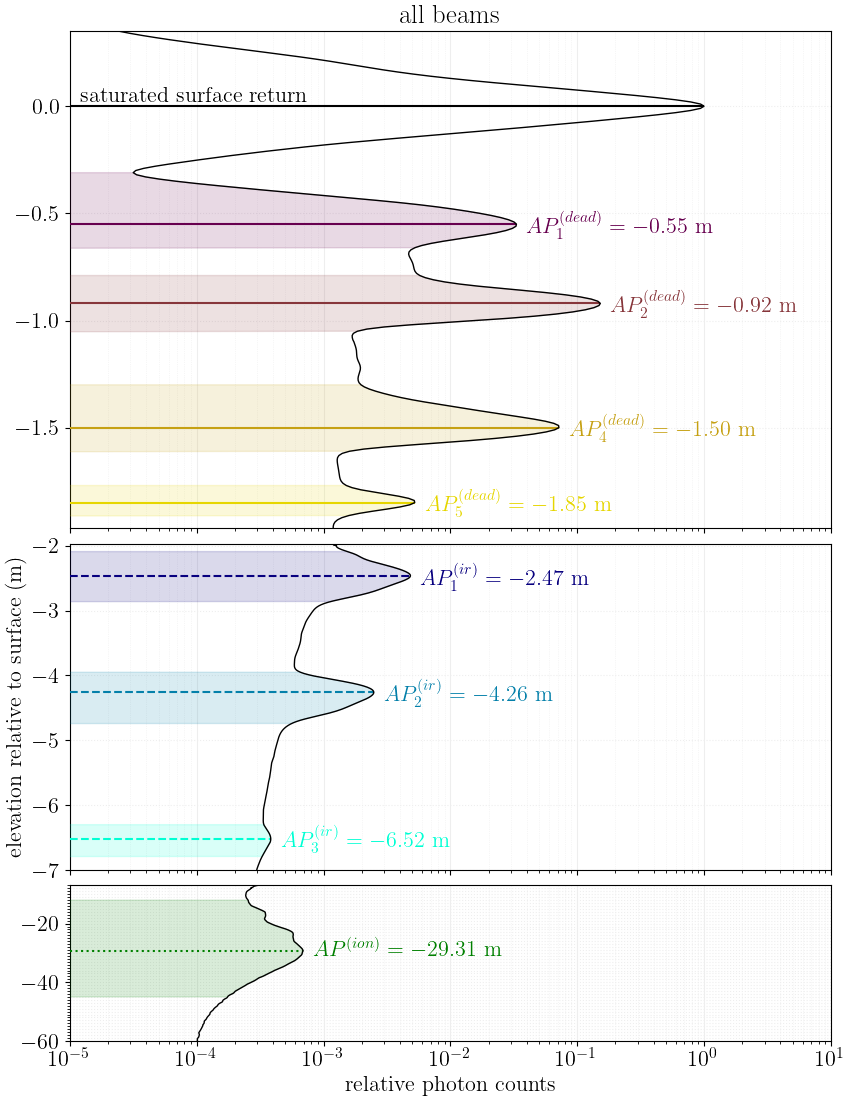

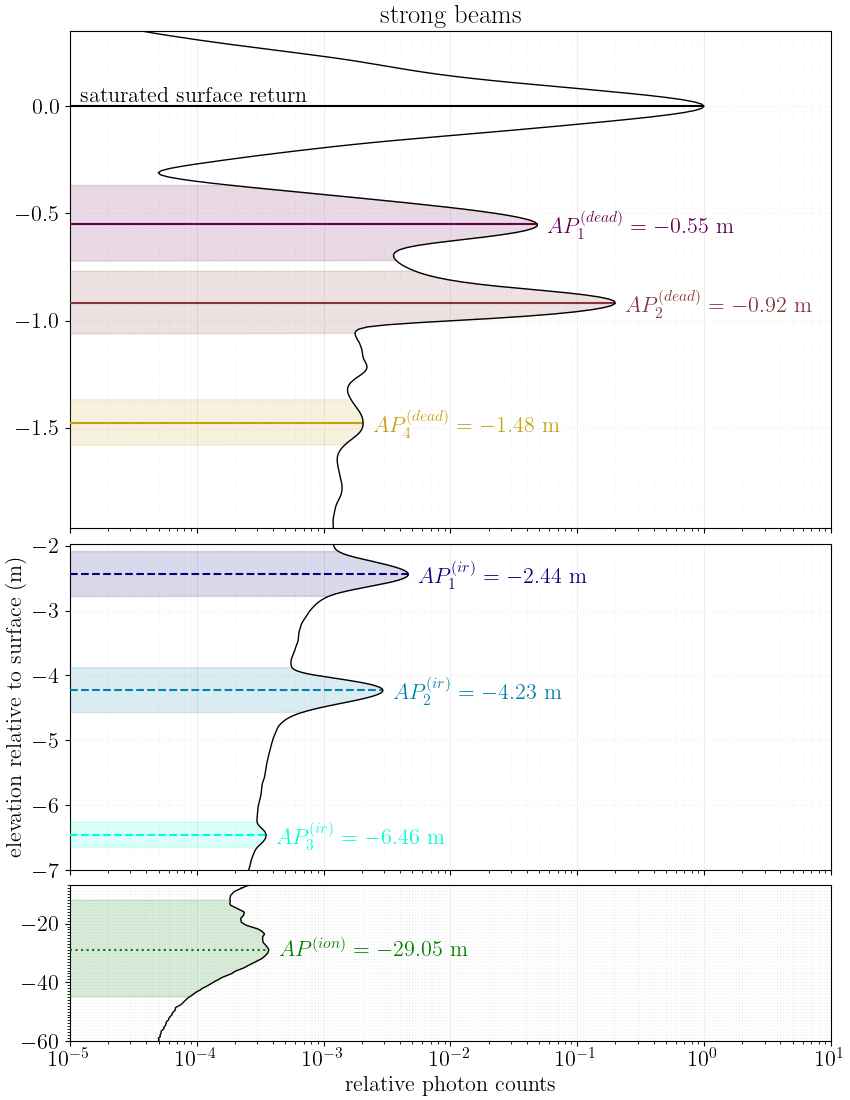

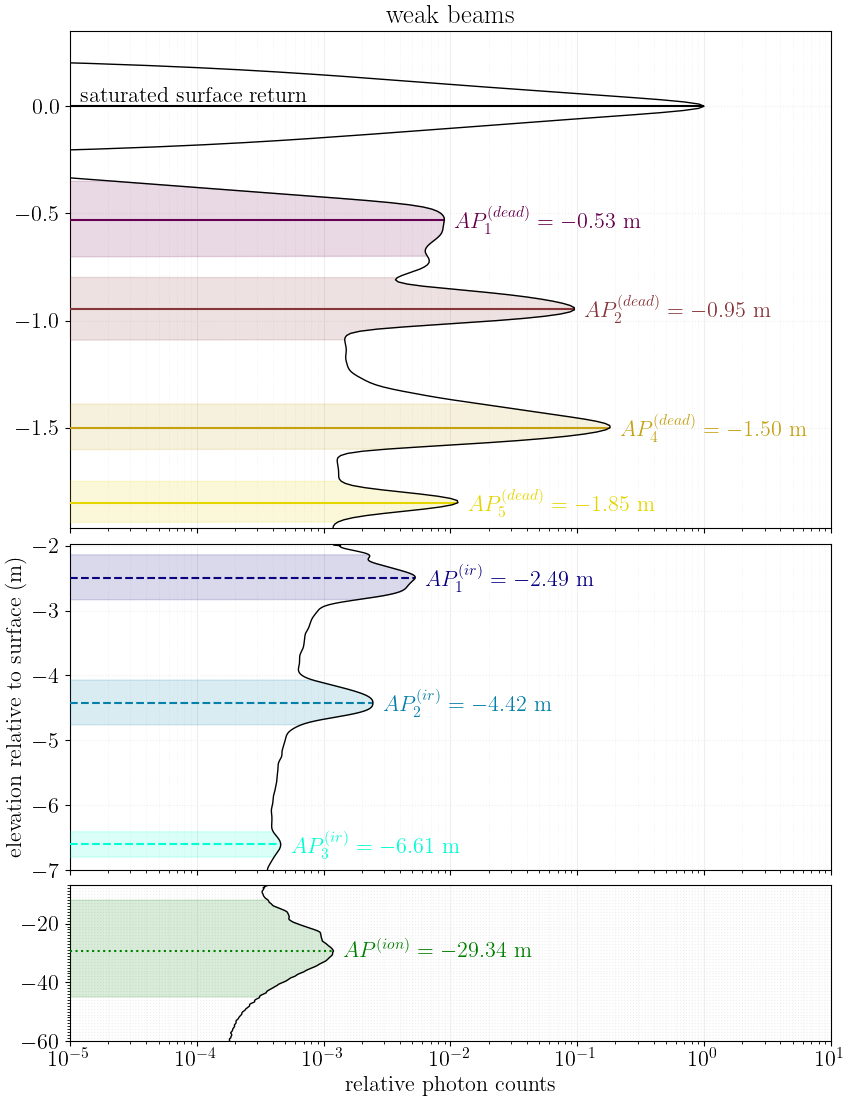

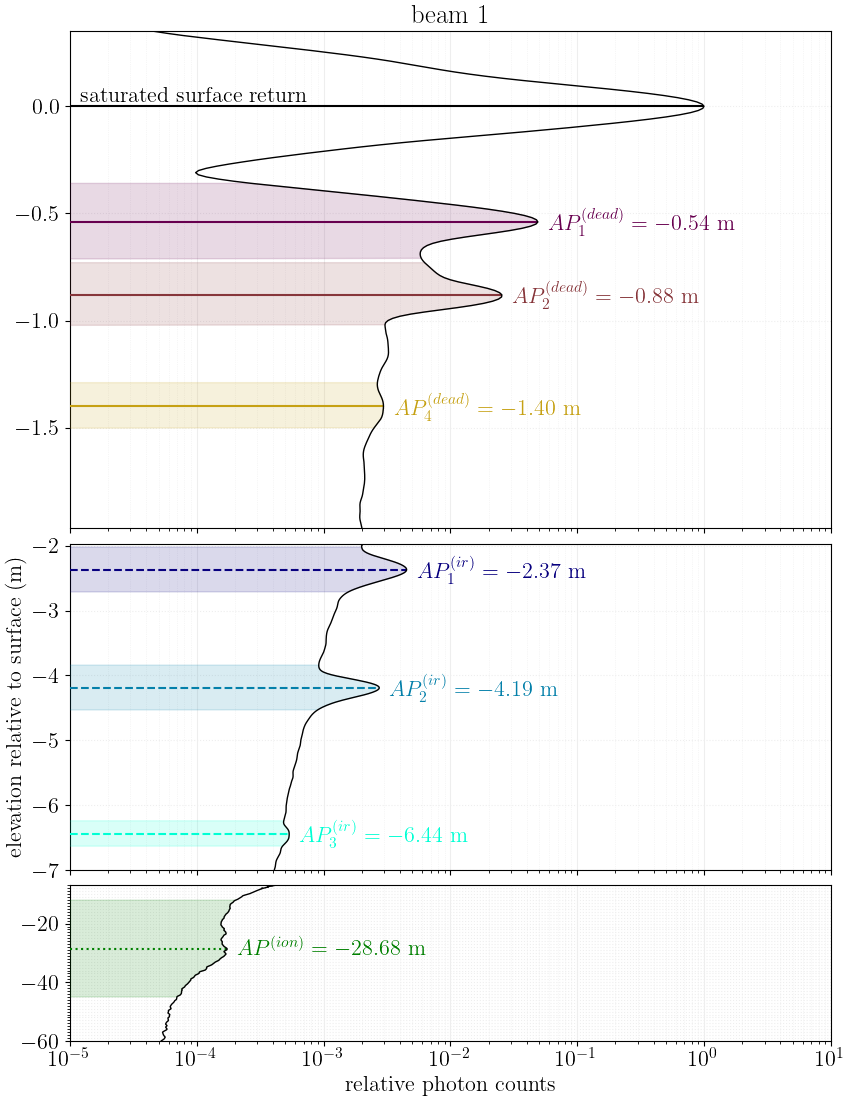

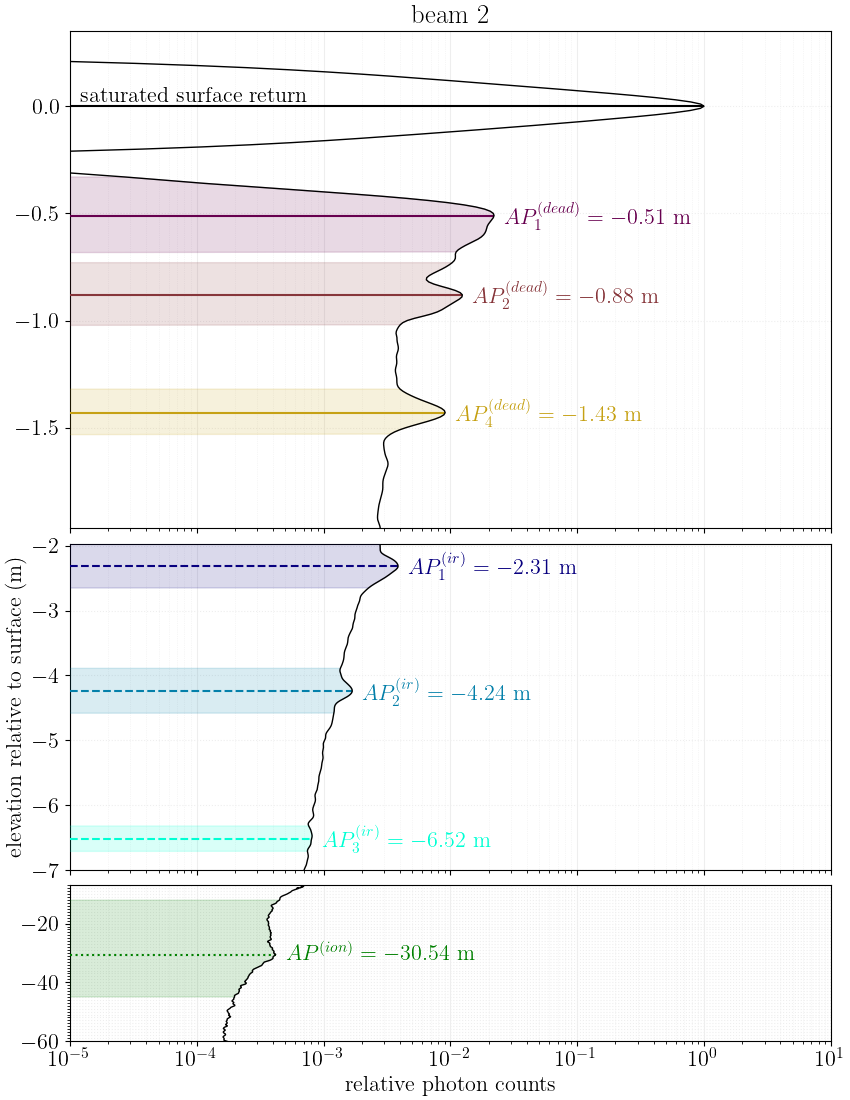

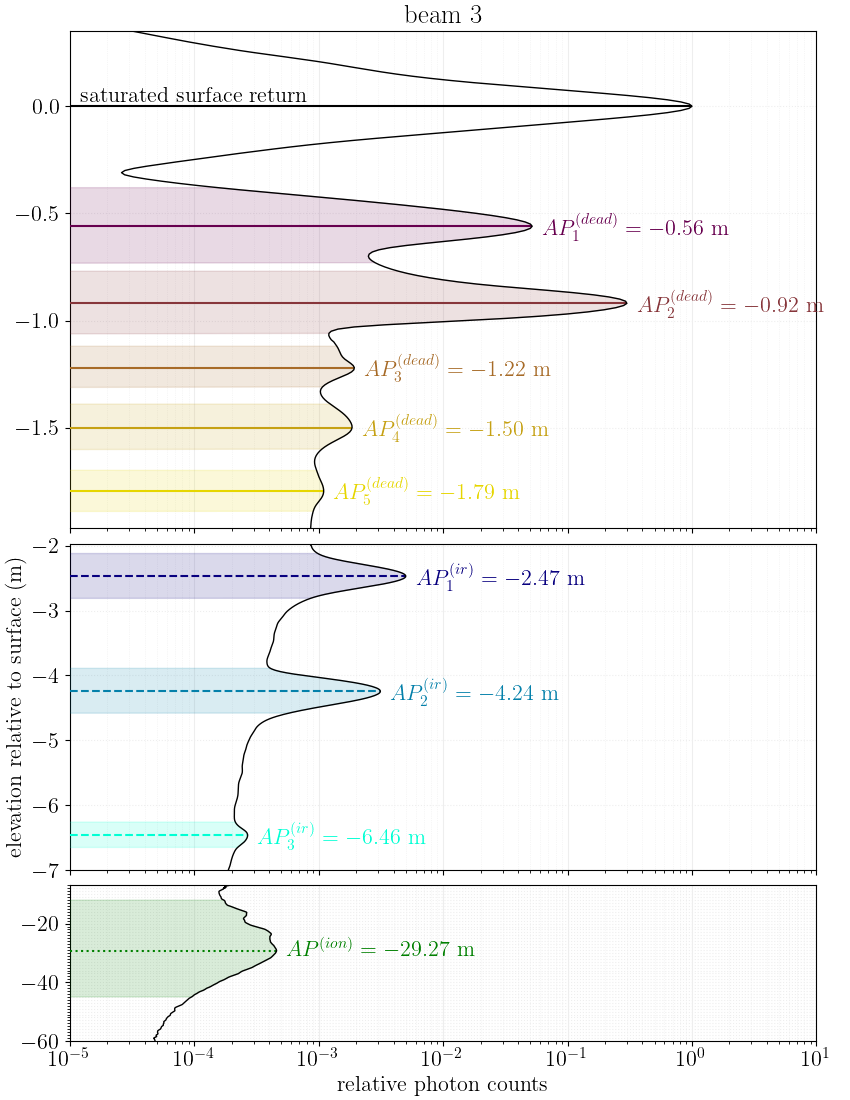

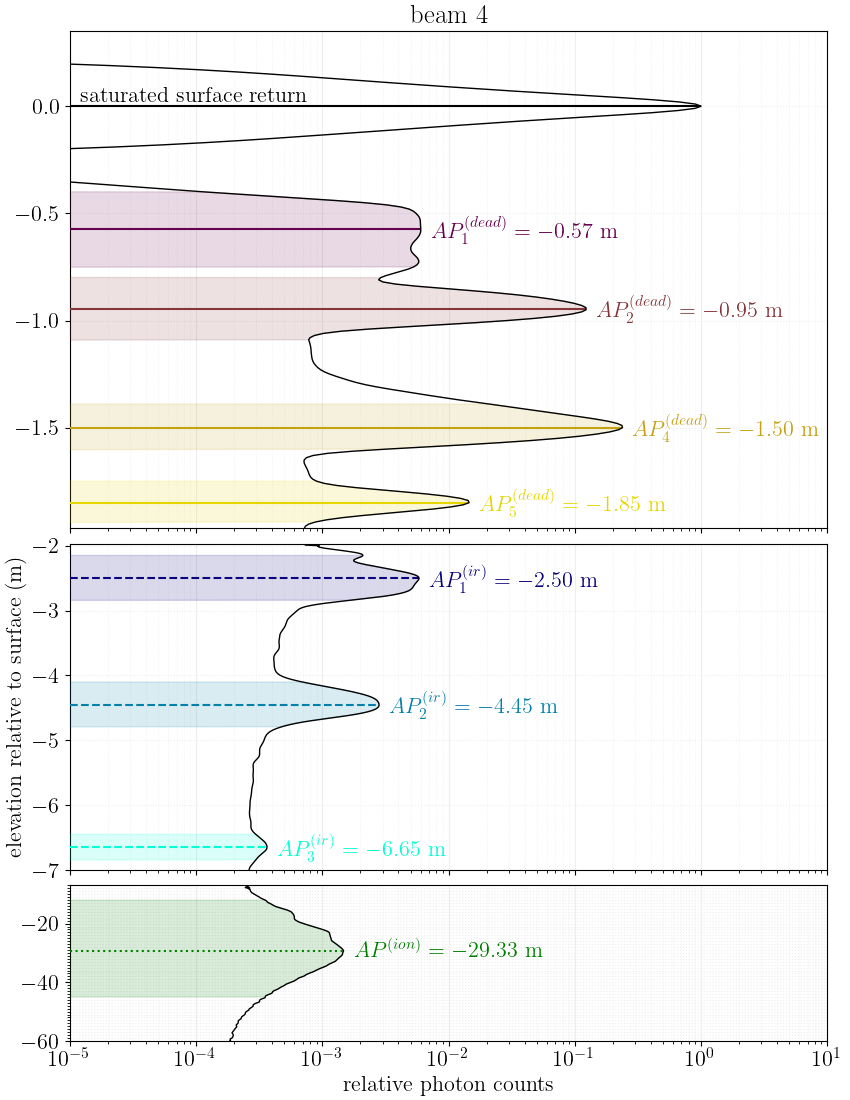

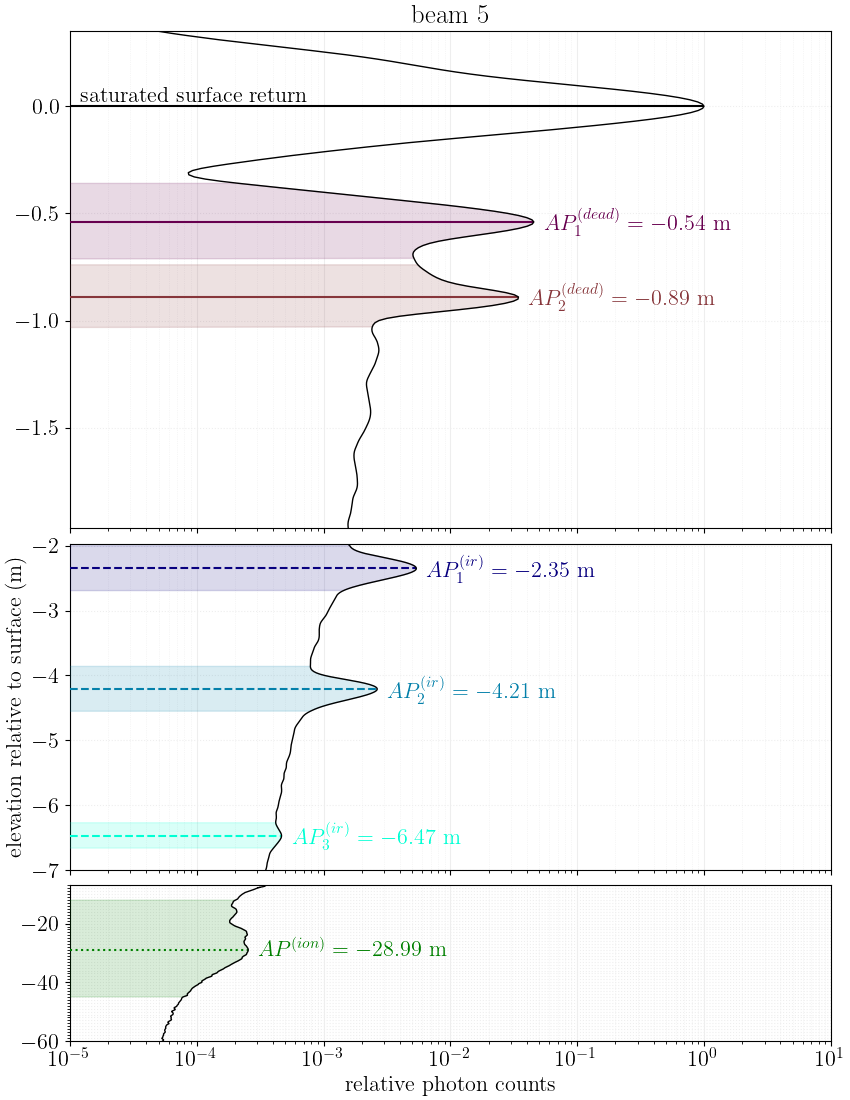

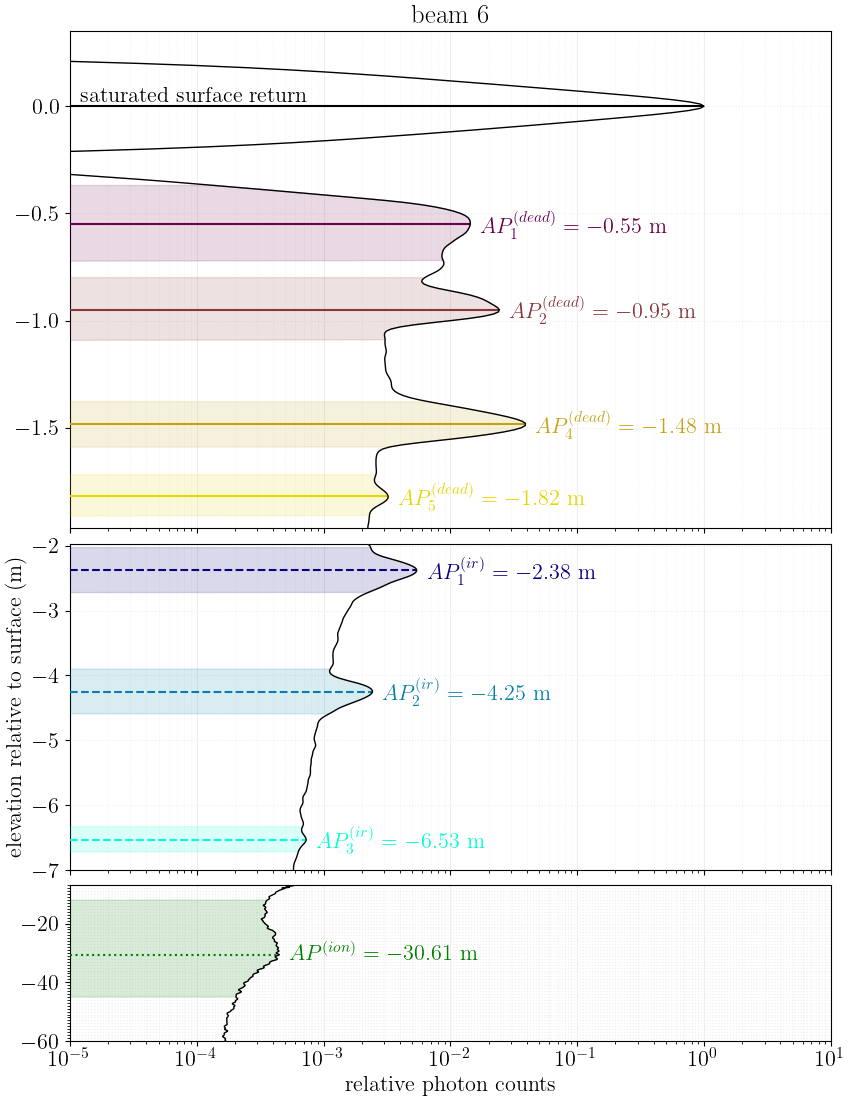

In [31]:
df = pd.read_csv('data/saturation_counts_alldata_wider.csv')

plt.rcParams.update({
    'font.size': 16,
    'text.usetex': True,
    'font.family': 'Optima'
})

thresh_upper = 0.35
thresh_mid = -1.97
thresh_lower = -7
thresh_tail = -60.0

peak_target_elevs = [0.0, -0.55, -0.92, -1.50, -1.85, -2.47, -4.26, -6.52]
peak_elevs_dict = {
    'all':    [0.0,  -0.55,  -0.92, np.nan,  -1.50,  -1.85,  -2.47,  -4.26,  -6.52, -29.31],
    'strong': [0.0,  -0.55,  -0.92, np.nan,  -1.48, np.nan,  -2.44,  -4.23,  -6.46, -29.05],
    'weak':   [0.0,  -0.53, -0.946, np.nan,  -1.50,  -1.85,  -2.49,  -4.42, -6.605, -29.34],
    '1':      [0.0,  -0.54,  -0.88, np.nan,  -1.40, np.nan,  -2.37,  -4.19,  -6.44, -28.68],
    '2':      [0.0,  -0.51,  -0.88, np.nan,  -1.43, np.nan,  -2.31,  -4.24,  -6.52, -30.54],
    '3':      [0.0,  -0.56,  -0.92,  -1.22,  -1.50, -1.795,  -2.47,  -4.24,  -6.46, -29.27],
    '4':      [0.0, -0.575, -0.946, np.nan,  -1.50,  -1.85,  -2.50,  -4.45,  -6.65, -29.33],
    '5':      [0.0,  -0.54,  -0.89, np.nan, np.nan, np.nan,  -2.35,  -4.21,  -6.47, -28.99],
    '6':      [0.0,  -0.55,  -0.95, np.nan, -1.484,  -1.82,  -2.38,  -4.25,  -6.53, -30.61],
}
peak_starts = [0.0, -0.31, -0.79, np.nan, -1.30, -1.77, -2.09, -3.95, -6.3]
peak_ends = [0.0, -0.67, -1.06, np.nan, -1.62, -1.92, -2.87, -4.75, -6.8]
# lower internal reflection and PMT ionization: -6.52, -29.31
peak_labels = ['surface'] + [r'$AP_%i^{(dead)}=' % (i+1) for i in range(5)] + [r'$AP_%i^{(ir)}=' % (i+1) for i in range(3)]
widths_pk = [0.0, 0.18, 0.15, 0.1, 0.11, 0.1, 0.35, 0.35, 0.2, 17.0]
cols_pk = ['black','#67004F', '#87363B', '#A76B28', '#C6A114', '#E6D600', '#08007F', '#0480AA', '#00FFD4', 'green']
lsty_pk = ['-', '-', '-', '-', '-', '-', '--', '--', '--', ':']

for j, beam_select in enumerate(['all', 'strong', 'weak'] + list(np.arange(1,7))):
# for j, beam_select in enumerate(['all']):
# for j, beam_select in enumerate(['all', 'strong', 'weak']):
# for j, beam_select in enumerate([3]):  
    fig = plt.figure(figsize=[8.5, 11], dpi=100)
    gs = fig.add_gridspec(6, 1)
    ax = fig.add_subplot(gs[:3, 0])
    ax1 = fig.add_subplot(gs[3:5, 0])
    ax2 = fig.add_subplot(gs[5, 0], sharex=ax)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)
    xlim_ax = (1e-5,10)

    vals = df['smooth_%s'%beam_select]
    peak_target_elevs = peak_elevs_dict[str(beam_select)]
    
    ##############################################################    
    ax.plot(vals, df.elev_bins, 'k-', lw=1, zorder=1000)
    for i in np.arange(0,6):
        thish = peak_target_elevs[i]
        if not np.isnan(thish):
            thispeak_height = vals.iloc[np.argmin(np.abs(df.elev_bins-thish))]
            ax.plot([xlim_ax[0], thispeak_height], [thish]*2, color=cols_pk[i], ls=lsty_pk[i], zorder=100,solid_capstyle='butt')
            if i == 0:
                ax.text(1.2*xlim_ax[0], thish, 'saturated surface return', color=cols_pk[i], ha='left', va='bottom')
            else:
                ax.text(thispeak_height*1.2, thish, r'%s%.2f$ m' % (peak_labels[i],thish), color=cols_pk[i], weight='bold', va='center')
                if beam_select == 'all':
                    u = peak_starts[i]
                    l = peak_ends[i]
                else:
                    u = thish + widths_pk[i]
                    l = thish - widths_pk[i]
                ys = [u, l] + list(df.elev_bins[(df.elev_bins <= u) & (df.elev_bins >= l)]) + [u]
                xs = [1e-12, 1e-12] +  list(vals[(df.elev_bins <= u) & (df.elev_bins >= l)]) + [1e-12]
                ax.add_patch(Polygon(np.transpose(np.vstack((xs,ys))), color=cols_pk[i], alpha=0.15,zorder=50))

    if type(beam_select) == str:
        tit = '%s beams' % beam_select
    else:
        tit = 'beam %i' % beam_select
    if j != 0:
        ax.set_title(tit)
    
    #ax.set_ylabel('elevation relative to surface (m)')
    ax.set_xlim(xlim_ax)
    ylms = (thresh_mid, thresh_upper)
    ax.set_ylim(ylms)
    ax.set_xscale('log')
    ax.axes.yaxis.grid(which='major', color='#EEEEEE', linestyle=':', linewidth=0.8, zorder=-1000)
    ax.axes.xaxis.grid(which='major', color='#EEEEEE', linewidth=0.8, zorder=-1000)
    ax.axes.xaxis.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5, zorder=-1000)
    # ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

    ##############################################################
    ax1.plot(vals, df.elev_bins, 'k-', lw=1, zorder=1000)
    for i in np.arange(6,9):
        thish = peak_target_elevs[i]
        if not np.isnan(thish):
            thispeak_height = vals.iloc[np.argmin(np.abs(df.elev_bins-thish))]
            ax1.plot([xlim_ax[0], thispeak_height], [thish]*2, color=cols_pk[i], ls=lsty_pk[i], zorder=100,solid_capstyle='butt')
            ax1.text(thispeak_height*1.2, thish, r'%s%.2f$ m' % (peak_labels[i],thish), color=cols_pk[i], weight='bold', va='center')
            if beam_select == 'all':
                u = peak_starts[i]
                l = peak_ends[i]
            else:
                u = thish + widths_pk[i]
                l = thish - widths_pk[i]
            ys = [u, l] + list(df.elev_bins[(df.elev_bins <= u) & (df.elev_bins >= l)]) + [u]
            xs = [1e-12, 1e-12] +  list(vals[(df.elev_bins <= u) & (df.elev_bins >= l)]) + [1e-12]
            ax1.add_patch(Polygon(np.transpose(np.vstack((xs,ys))), color=cols_pk[i], alpha=0.15,zorder=50))

    ax1.set_ylabel('elevation relative to surface (m)')
    ax1.set_xlim(xlim_ax)
    ylms = (thresh_lower, thresh_mid)
    ax1.set_ylim(ylms)
    ax1.set_xscale('log')
    ax1.axes.yaxis.grid(which='major', color='#EEEEEE', linestyle=':', linewidth=0.8, zorder=-1000)
    ax1.axes.xaxis.grid(which='major', color='#EEEEEE', linewidth=0.8, zorder=-1000)
    ax1.axes.xaxis.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5, zorder=-1000)
            
    ##############################################################
    ax2.plot(vals, df.elev_bins, 'k-', lw=1, zorder=1000)
    u = -12
    l = -45
    ys = [u, l] + list(df.elev_bins[(df.elev_bins <= u) & (df.elev_bins >= l)]) + [u]
    xs = [1e-12, 1e-12] +  list(vals[(df.elev_bins <= u) & (df.elev_bins >= l)]) + [1e-12]
    ax2.add_patch(Polygon(np.transpose(np.vstack((xs,ys))), color='g', alpha=0.15,zorder=50))
    thish = peak_target_elevs[9]
    thispeak_height = vals.iloc[np.argmin(np.abs(df.elev_bins-thish))]
    ax2.plot([xlim_ax[0], thispeak_height], [thish]*2, color='g', ls=':', zorder=100,solid_capstyle='butt')
    ax2.text(thispeak_height*1.2, thish, r'$AP^{(ion)}=%.2f$ m' % thish, color='g', weight='bold', va='center')
    
    ax2.set_xlabel('relative photon counts')
    ylms = (thresh_tail, thresh_lower)
    ax2.set_ylim(ylms)
    ax2.yaxis.set_minor_locator(AutoMinorLocator(20))
    ax2.axes.yaxis.grid(which='both', color='#EEEEEE', linestyle=':', linewidth=0.8, zorder=-1000)
    ax2.axes.xaxis.grid(which='major', color='#EEEEEE', linewidth=0.8, zorder=-1000)
    ax2.axes.xaxis.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5, zorder=-1000)
    #ax2.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)

    ax.set_title(tit)
    
    fig.tight_layout(pad=0.2)
    
    plt.savefig('plots/saturation_counts_beams_%s_PMT.jpg' % beam_select, dpi=600)

In [14]:
peak_elevs_dict = {
    'all':    [0.0,  -0.55,  -0.92, np.nan,  -1.50,  -1.85,  -2.47,  -4.26,  -6.52, -29.31],
    'strong': [0.0,  -0.55,  -0.92, np.nan,  -1.48, np.nan,  -2.44,  -4.23,  -6.46, -29.05],
    'weak':   [0.0,  -0.53, -0.946, np.nan,  -1.50,  -1.85,  -2.49,  -4.42, -6.605, -29.34],
    '1':      [0.0,  -0.54,  -0.88, np.nan,  -1.40, np.nan,  -2.37,  -4.19,  -6.44, -28.68],
    '2':      [0.0,  -0.51,  -0.88, np.nan,  -1.43, np.nan,  -2.31,  -4.24,  -6.52, -30.54],
    '3':      [0.0,  -0.56,  -0.92,  -1.22,  -1.50, -1.795,  -2.47,  -4.24,  -6.46, -29.27],
    '4':      [0.0, -0.575, -0.946, np.nan,  -1.50,  -1.85,  -2.50,  -4.45,  -6.65, -29.33],
    '5':      [0.0,  -0.54,  -0.89, np.nan, np.nan, np.nan,  -2.35,  -4.21,  -6.47, -28.99],
    '6':      [0.0,  -0.55,  -0.95, np.nan, -1.484,  -1.82,  -2.38,  -4.25,  -6.53, -30.61],
}

In [82]:
from scipy.signal import find_peaks, peak_widths
hs = df.elev_bins
sel = hs < -0.3
# hs = hs[sel]
# vals = vals[sel]
vals[vals==0] = 1e-4
clog = np.log10(vals)
clog[~sel] = -3.2
pks, prps = find_peaks(clog, distance=10, prominence=0.05, width=None, wlen=None, rel_height=0.1)
wds = peak_widths(clog, pks, rel_height=0.8)

In [83]:
el_pk = np.array(hs[pks])
h_pk  = np.array(clog[pks])

In [84]:
li = list(np.round(wds[2]).astype(np.int32))
lb = np.array(hs[li])
lb_h = np.array(clog[li])
ui = list(np.round(wds[3]).astype(np.int32))
ub = np.array(hs[ui])
ub_h = np.array(clog[ui])

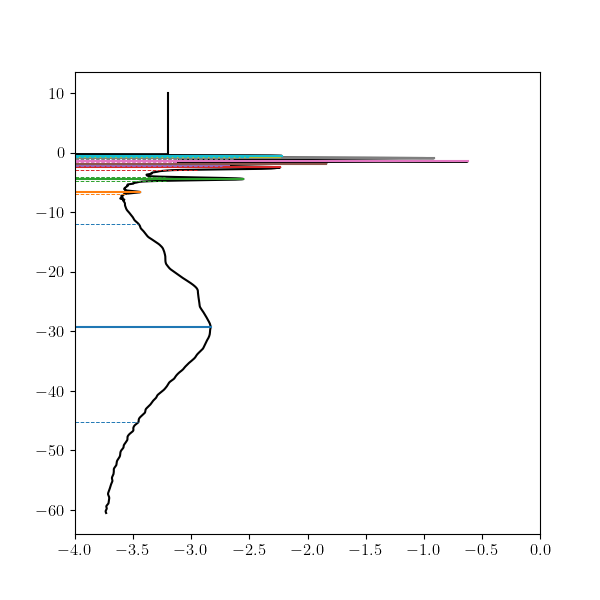

In [85]:
fig,ax = plt.subplots(figsize=[6, 6], dpi=100)
ax.plot(clog, hs, 'k-')
ax.set_xlim((-4, 0))
for j, el in enumerate(el_pk):
    ax.plot([-4, h_pk[j]], [el]*2, ls='-', c='C%i'%j)
    ax.plot([-4, lb_h[j]], [lb[j]]*2, ls='--', lw=0.7, c='C%i'%j)
    ax.plot([-4, ub_h[j]], [ub[j]]*2, ls='--', lw=0.7, c='C%i'%j)